In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Deekshita\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Deekshita\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Deekshita\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
  

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\Deekshita\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\Deekshita\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\Deekshita\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
  

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:
features_path = "../data/processed/engineered_features.csv"
anomaly_path = "../data/processed/anomaly_iforest.csv"

df = pd.read_csv(features_path)
an = pd.read_csv(anomaly_path)

an = an.rename(columns={"IFOREST_SCORE": "anomaly_score", "IFOREST_ANOMALY": "is_anomaly"})
df = df.merge(an[["DATE", "anomaly_score", "is_anomaly"]], on="DATE", how="left")

# Convert DATE to datetime
df["DATE"] = pd.to_datetime(df["DATE"])

print("Data Loaded:", df.shape)
df.head()


Data Loaded: (12000, 22)


,CONS_NO,FLAG,DATE,CONSUMPTION,YEAR,MONTH,DAY,DAY_OF_WEEK,ROLL_MEAN_3,ROLL_STD_3,...,DAILY_ENERGY,LOAD_FACTOR,MIN_MAX_RATIO,DIFF_3,DIFF_7,VOLATILITY_INDEX,OFFPEAK_3,PEAK_OFFPEAK_RATIO,anomaly_score,is_anomaly
0,CUST_0001,1,2014-01-01,5.68,2014,1,1,2,NaN,NaN,...,5.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.464543,0
1,CUST_0001,1,2014-01-01,5.68,2014,1,1,2,NaN,NaN,...,5.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.517860,0
2,CUST_0001,1,2014-01-01,5.68,2014,1,1,2,NaN,NaN,...,5.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.474389,0
3,CUST_0001,1,2014-01-01,5.68,2014,1,1,2,NaN,NaN,...,5.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.460356,0
4,CUST_0001,1,2014-01-01,5.68,2014,1,1,2,NaN,NaN,...,5.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.478725,0


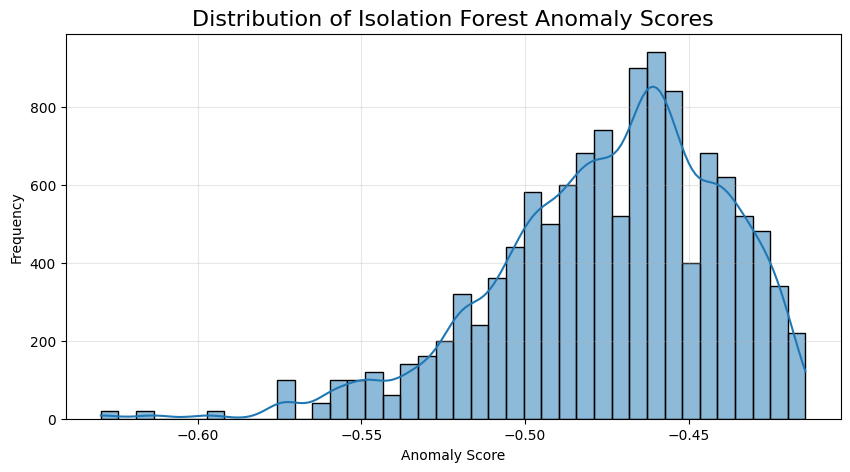

In [3]:
plt.figure(figsize=(10,5))
sns.histplot(df["anomaly_score"], bins=40, kde=True)
plt.title("Distribution of Isolation Forest Anomaly Scores", fontsize=16)
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

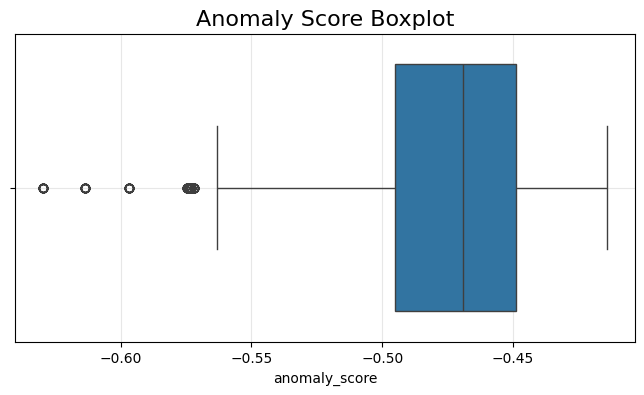

In [4]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["anomaly_score"])
plt.title("Anomaly Score Boxplot", fontsize=16)
plt.grid(True, alpha=0.3)
plt.show()

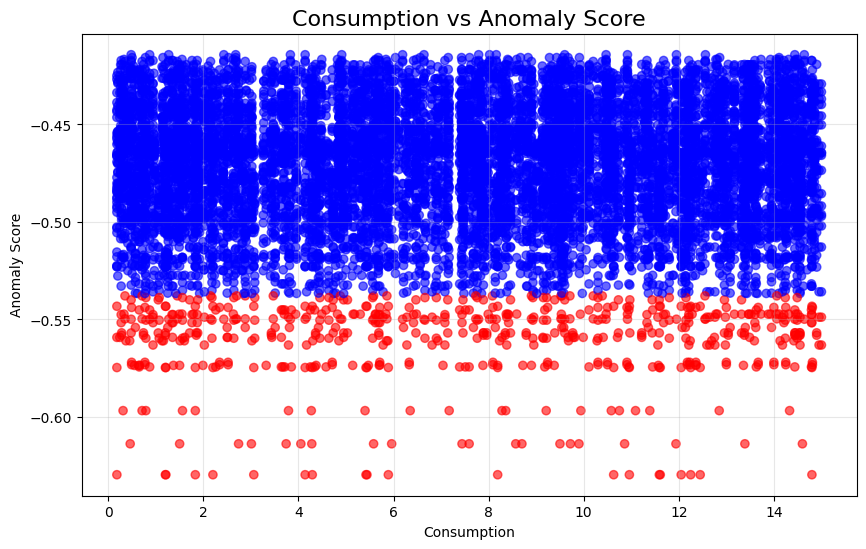

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df["CONSUMPTION"], df["anomaly_score"], 
            c=df["is_anomaly"].map({0: "blue", 1: "red"}), alpha=0.6)

plt.title("Consumption vs Anomaly Score", fontsize=16)
plt.xlabel("Consumption")
plt.ylabel("Anomaly Score")
plt.grid(True, alpha=0.3)
plt.show()

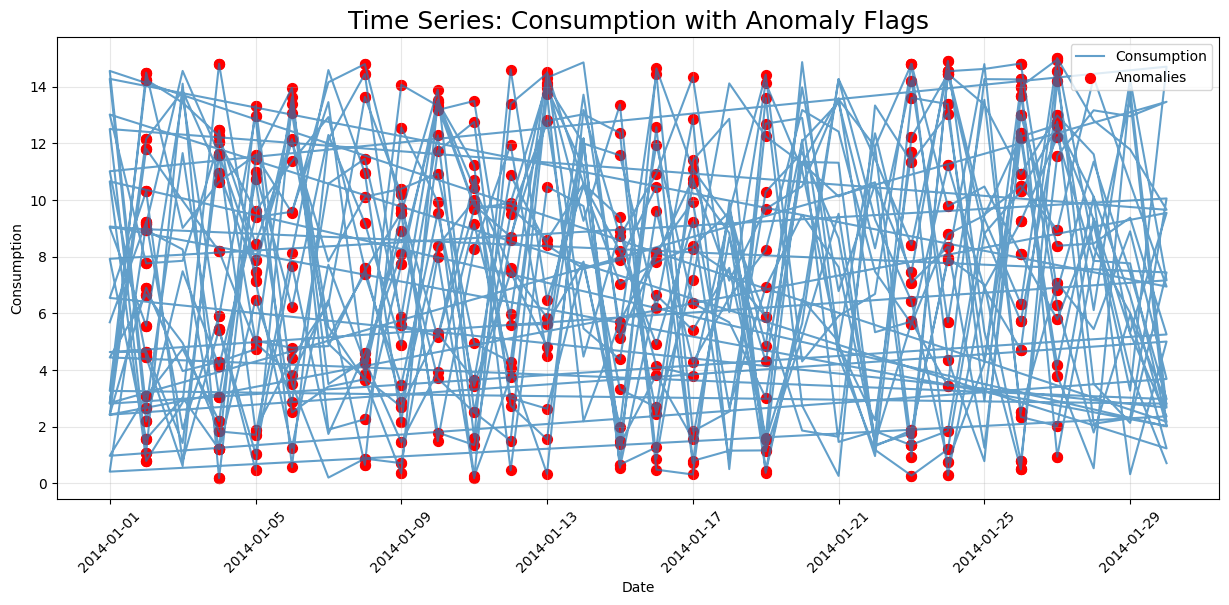

In [6]:
plt.figure(figsize=(15,6))

plt.plot(df["DATE"], df["CONSUMPTION"], label="Consumption", alpha=0.7)

# Highlight anomalies
anomalies = df[df["is_anomaly"] == 1]
plt.scatter(anomalies["DATE"], anomalies["CONSUMPTION"], 
            color="red", label="Anomalies", s=50)

plt.title("Time Series: Consumption with Anomaly Flags", fontsize=18)
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.legend()
plt.grid(True, alpha=0.3)

plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45)

plt.show()

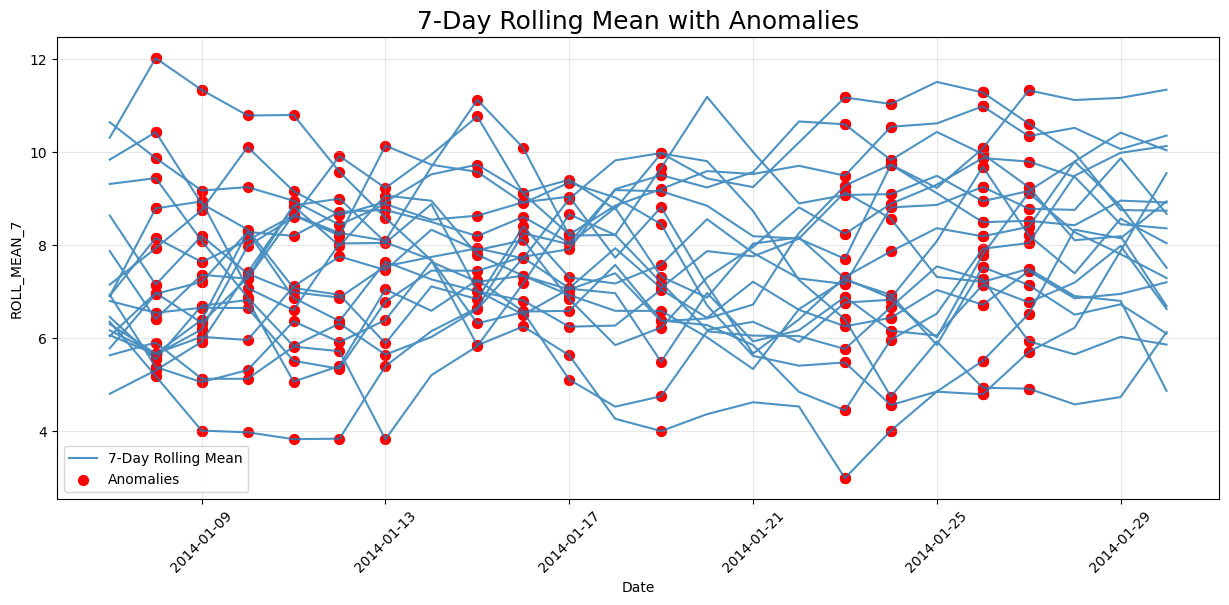

In [7]:
plt.figure(figsize=(15,6))
plt.plot(df["DATE"], df["ROLL_MEAN_7"], label="7-Day Rolling Mean", alpha=0.8)

plt.scatter(anomalies["DATE"], anomalies["ROLL_MEAN_7"], 
            color="red", s=50, label="Anomalies")

plt.title("7-Day Rolling Mean with Anomalies", fontsize=18)
plt.xlabel("Date")
plt.ylabel("ROLL_MEAN_7")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [9]:
summary = df.groupby("is_anomaly")["CONSUMPTION"].agg(["count", "mean", "min", "max"])


In [10]:
print(summary)

            count      mean   min   max
is_anomaly                             
0           11400  7.596824  0.18  15.0
1             600  7.561350  0.18  15.0
